# Fandango

**Autor:** Andrés Felipe Jerez Ariza
## Descripción  General
El objetivo de este trabajo es emplear la librería ``matplotlib`` para personalizar gráficas. De modo que, se realiza una réplica de las gráficas que se presentan en el artículo [_**Be Suspicious Of Online Movie Ratings, Especially Fandango’s**_](https://fivethirtyeight.com/features/fandango-movies-ratings/)

## Importación de librerías



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.style as style
style.available
%matplotlib inline
style.use('fivethirtyeight') #

## Datos

Se cargan los datos mediante el comando ``pd.read_csv``, es decir, las tablas ``fandango_scrape.cs`` y ``fandango_score_comparison.csv`` ubicadas en la ruta ``~/Documentos/Fandango/fandango_scrape.csv``,  se asignan a las variables ``dataA`` y ``dataB``, respectivamente. Estos datos contienen información de calificaciones de películas en diferentes plataformas web.

In [14]:
dataA = pd.read_csv('/home/felipe/Documentos/Fandango/fandango_scrape.csv');
dataB = pd.read_csv('/home/felipe/Documentos/Fandango/fandango_score_comparison.csv');

En este caso, se emplea el atributo ``.values`` para convertir ``dataA`` y ``dataB`` de  tipo ``pandas`` a tipo ``numpy``, con el objetivo de emplear las características que ofrece ``numpy``.

In [15]:
DA=dataA.values
DB=dataB.values

## Visualización de tablas
- Se muestran los 5 primeros registros de dataA

In [16]:
dataA.head(5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


- Se muestran los 5 primeros registros de dataB

In [17]:
dataB.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


# Curva de calificación según Fandango

### Condiciones:
(1) Películas con más de 30 opiniones.

(2) Películas estrenadas en 2015.

In [18]:
puntajeA=list(set(DA[:,1])) # Se crea una lista de puntuaciones sin repetir
puntajeA.sort() # Se organiza de menor a mayor estas puntuaciones
ma=DA[:,3]>30; # Se evalúa la condición (1)
yearsA = [x[-5:-1] for x in DA[:,0]]; # Se crea una lista de los años
na=(np.array(yearsA)=='2015'); # Se evalú la condición (2)
Ta=np.sum(ma*na*1); # Suma el número de registros que cumplen las dos condiciones
porcentaje = [np.sum(DA[ma*na,1]==s)/Ta for s in puntajeA];
print(Ta)

190


## Creación de la gráfica

Text(0.7,0.8,'Fandango \n presented \n rating')

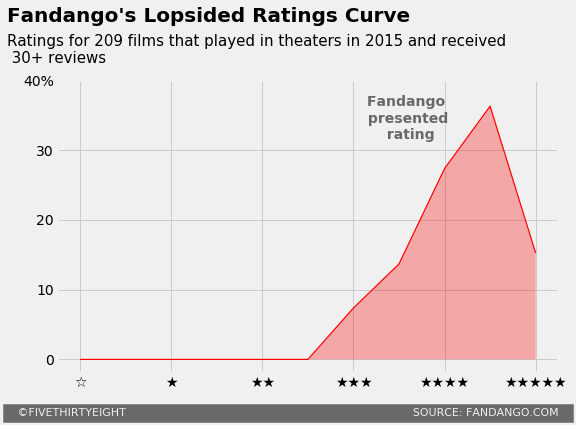

In [19]:
fig=plt.figure(figsize=(8,5));
fte_graph=fig.add_subplot(111);
fte_graph.plot(puntajeA,porcentaje,color="red",linewidth=1.2);
fte_graph.fill_between(puntajeA,0,porcentaje,facecolor="red",alpha=0.3)

# Se perzonaliza las etiquetas del eje x
fte_graph.set_xticklabels(labels = [-10, '☆', '★', '★★', '★★★', '★★★★', '★★★★★'])

# Se perzonaliza las etiquetas del eje y
fte_graph.set_yticklabels(labels = [ '0', '10', '20', '30', '40%'])

plt.yticks(np.arange(0,0.5,0.10)) # Se especifica la escala del eje y

# Firma de la barra
fte_graph.text(x = -0.1, y = -0.15,         
               s = '   ©FIVETHIRTYEIGHT                                                                                  SOURCE: FANDANGO.COM   ',
    transform=fte_graph.transAxes,fontsize = 11, color = '#f0f0f0', backgroundcolor = 'dimgrey')


# Se agrega un título y un subtítulo
fte_graph.text(x = -0.1, y = 1.2, s = "Fandango's Lopsided Ratings Curve",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold')
fte_graph.text(x = -0.1, y = 1.06, 
               s = "Ratings for 209 films that played in theaters in 2015 and received \n 30+ reviews",
              transform=fte_graph.transAxes,fontsize = 15)

# Se agrega color en las etiquetas
fte_graph.text(x = 0.7, y = 0.8, s = 'Fandango \n presented \n rating', color = 'dimgrey',horizontalalignment='center', weight = 'bold', rotation = 0,transform=fte_graph.transAxes)

# Comparación de curvas de calificación

### Condiciones:
(1) Películas con más de 30 opiniones.

(2) Películas estrenadas en 2015.

(3) Películas que se intersectan en los datasets ``dataA`` y ``dataB``

In [20]:
# Se convierte en minúscula y se eliminan los espacios en la columna donde se encuentra el nombre de las películas en los dos datasets
cadenaA=[DA[x,0].lower().replace(' ', '') for x in range(len(DA[:,0]))];
cadenaB=[DB[x,0].lower().replace(' ', '') for x in range(len(DB[:,0]))];
cadenaA=np.array(cadenaA);
cadenaB=np.array(cadenaB);
v=np.zeros(np.shape(cadenaB));
for i in range(len(cadenaA)):
    v=(cadenaA[i]==cadenaB)+v; # Se evalúa la condición (3)

puntajeB=list(set(DB[:,13])); # Se crea una lista de puntuaciones sin repetir
puntajeB.sort(); # Se organiza de menor a mayor estas puntuaciones
mb=DB[:,20]>30; # Se evalúa la condición (1)
yearsB = [x[-5:-1] for x in DB[:,0]]; # Se crea una lista de los años
nb=(np.array(yearsB)=='2015'); # Se evalú la condición (2)
Tb=np.sum(mb*nb*(v==1)*1); # Suma el número de registros que cumplen las dos condiciones
porcentajeFAN = [np.sum(DB[mb*nb*(v==1),6]==s)/Tb for s in puntajeB];
porcentajeRT = [np.sum(DB[mb*nb*(v==1),13]==s)/Tb for s in puntajeB];
porcentajeRTU = [np.sum(DB[mb*nb*(v==1),14]==s)/Tb for s in puntajeB];
porcentajeMET = [np.sum(DB[mb*nb*(v==1),15]==s)/Tb for s in puntajeB];
porcentajeMETU = [np.sum(DB[mb*nb*(v==1),16]==s)/Tb for s in puntajeB];
porcentajeIMDB = [np.sum(DB[mb*nb*(v==1),17]==s)/Tb for s in puntajeB];
print(Tb)

126


## Creación de la gráfica

Text(0.57,0.7,'__________')

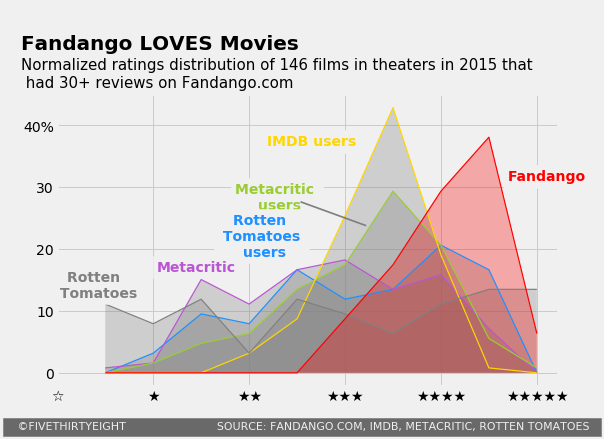

In [21]:
figs=plt.figure(figsize=(8,5));
fte_graphs=figs.add_subplot(111);
fte_graphs.plot(puntajeB,porcentajeRTU,color="dodgerblue",linewidth=1.2)
fte_graphs.fill_between(puntajeB,0,porcentajeRTU,facecolor="gray",alpha=0.3)
fte_graphs.plot(puntajeB,porcentajeMET,color="mediumorchid",linewidth=1.2)
fte_graphs.fill_between(puntajeB,0,porcentajeMET,facecolor="gray",alpha=0.3)
fte_graphs.plot(puntajeB,porcentajeMETU,color="yellowgreen",linewidth=1.2)
fte_graphs.fill_between(puntajeB,0,porcentajeMETU,facecolor="gray",alpha=0.3)
fte_graphs.plot(puntajeB,porcentajeIMDB,color="gold",linewidth=1.2)
fte_graphs.fill_between(puntajeB,0,porcentajeIMDB,facecolor="gray",alpha=0.3)
fte_graphs.plot(puntajeB,porcentajeRT,color="gray",linewidth=1.2)
fte_graphs.fill_between(puntajeB,0,porcentajeRT,facecolor="gray",alpha=0.3)
fte_graphs.plot(puntajeB,porcentajeFAN,color="red",linewidth=1.2)
fte_graphs.fill_between(puntajeB,0,porcentajeFAN,facecolor="red",alpha=0.3)

# Se perzonaliza las etiquetas del eje x
fte_graphs.set_xticklabels(labels = ['☆', '★', '★★', '★★★', '★★★★', '★★★★★'])

plt.xticks(np.arange(0,5.5,1))

# Se perzonaliza las etiquetas del eje y
fte_graphs.set_yticklabels(labels = [-10, '0', '10', '20', '30', '40%'])


# Firma de la barra
fte_graphs.text(x = -0.1, y = -0.15,         
               s = '   ©FIVETHIRTYEIGHT                          SOURCE: FANDANGO.COM, IMDB, METACRITIC, ROTTEN TOMATOES  ',
    transform=fte_graphs.transAxes,fontsize = 11, color = '#f0f0f0', backgroundcolor = 'dimgrey')


# Se agrega un título y un subtítulo
fte_graphs.text(x = -0.05, y = 1.25, s = "Fandango LOVES Movies",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold')
fte_graphs.text(x = -0.05, y = 1.12, 
               s = "Normalized ratings distribution of 146 films in theaters in 2015 that \n had 30+ reviews on Fandango.com",
              transform=fte_graph.transAxes,fontsize = 15)

# Se agrega color a en las etiquetas
fte_graphs.text(x = 1, y = 0.8, s = 'Fandango', color = 'red',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)
fte_graphs.text(x = 0.53, y = 0.92, s = 'IMDB users', color = 'gold',horizontalalignment='center', backgroundcolor = '#f0f0f0', weight = 'bold', rotation = 0,transform=fte_graph.transAxes)
fte_graphs.text(x = 0.46, y = 0.7, s = 'Metacritic \n users', color = 'yellowgreen',horizontalalignment='center', backgroundcolor = '#f0f0f0', weight = 'bold', rotation = 0,transform=fte_graph.transAxes)
fte_graphs.text(x = 0.43, y = 0.54, s = 'Rotten \n Tomatoes \n users', color = 'dodgerblue',horizontalalignment='center', backgroundcolor = '#f0f0f0', weight = 'bold', rotation = 0,transform=fte_graph.transAxes)
fte_graphs.text(x = 0.3, y = 0.49, s = 'Metacritic', color = 'mediumorchid',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)
fte_graphs.text(x = 0.1, y = 0.4, s = 'Rotten \n Tomatoes', color = 'gray',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)
fte_graphs.text(x = 0.57, y = 0.7, s = '__________', color = 'gray',horizontalalignment='center', weight = 'bold', rotation = 160,transform=fte_graph.transAxes)


# Diferencia de curvas de calificación

En este caso se presenta una ilustración de la diferencia de la puntuación Fandango respecto a las demás calificaciones. Es decir, se presenta el promedio de las diferencias obtenidas en una calificación específica.

Text(0.7,0.8,'Fandango \n presented \n difference')

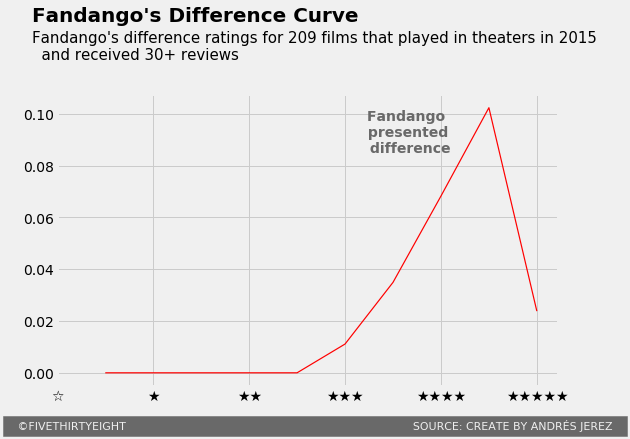

In [22]:
porcentajeD = [np.sum(DB[mb*nb*(v==1)*(DB[:,6]==s),21])/Tb for s in puntajeB];
figD=plt.figure(figsize=(8,5));
fte_graphD=figD.add_subplot(111);
fte_graphD.plot(puntajeB,porcentajeD,color="red",linewidth=1.2);

# Se perzonaliza las etiquetas del eje x
fte_graphD.set_xticklabels(labels = ['☆', '★', '★★', '★★★', '★★★★', '★★★★★'])

plt.xticks(np.arange(0,5.5,1))


# Firma de la barra
fte_graphD.text(x = -0.1, y = -0.15,         
               s = '   ©FIVETHIRTYEIGHT                                                                                  SOURCE: CREATE BY ANDRÉS JEREZ   ',
    transform=fte_graphD.transAxes,fontsize = 11, color = '#f0f0f0', backgroundcolor = 'dimgrey')


# Se agrega un título y un subtítulo
fte_graphD.text(x = -0.05, y = 1.25, s = "Fandango's Difference Curve",transform=fte_graphD.transAxes,
               fontsize = 20, weight = 'bold')
fte_graphD.text(x = -0.05, y = 1.12,
               s = "Fandango's difference ratings for 209 films that played in theaters in 2015 \n  and received 30+ reviews",
              transform=fte_graphD.transAxes,fontsize = 15)


# Se agrega color en las etiquetas
fte_graphD.text(x = 0.7, y = 0.8, s = 'Fandango \n presented \n difference', color = 'dimgrey',horizontalalignment='center', weight = 'bold', rotation = 0,transform=fte_graphD.transAxes)

_Nota:_ Se puede observar en esta gráfica que a mayor puntación de las películas se presenta mayor error o diferencia respecto a las opiniones de las demás páginas web, por lo tanto, se puede apreciar que existe una incongruencia entre los resultados que presenta Fandango.com comparado con los resultados de las páginas.